In [86]:
using DataFrames
using BenchmarkTools
using Plots
using Animations

In [87]:
function measure_distance(cities)
    city1, city2 = cities, [circshift(cities[i],(-1)) for i in 1:length(cities)]
    x1, y1 = city1[1], city1[2]
    x2, y2 = city2[1], city2[2]
    distance = sqrt.(((x2-x1).^2)+((y2-y1).^2))
    return sum(distance)
end
    

measure_distance (generic function with 1 method)

In [112]:
function find_new_route(cities,N)
    new_cities = deepcopy(cities)
    new_cities2 = deepcopy(cities)
    p = rand(1:N)
    l = rand(1:N÷2)
    if p+l <= N
        new_cities[1][p+1:p+l] = cities[1][p+1:p+l][end:-1:1]
        new_cities[2][p+1:p+l] = cities[2][p+1:p+l][end:-1:1]
        return new_cities
    else
        new_cities2[1][p+1:end] = cities[1][p+1:end][end:-1:1]
        new_cities2[2][p+1:end] = cities[2][p+1:end][end:-1:1]
        return new_cities2
    end
end

find_new_route (generic function with 1 method)

In [129]:
function threshold_algorithm(cities)
    newcities = find_new_route(cities,N)
    if measure_distance(newcities) <= measure_distance(cities)
        cities = deepcopy(newcities)
    end
    return cities
end

threshold_algorithm (generic function with 1 method)

In [130]:
function boltzmann_algorithm(cities,T)
    newcities2 = find_new_route(cities,N)
    if T > (measure_distance(newcities2) - measure_distance(cities))
        cities = deepcopy(newcities2)
    end
    return cities
end

boltzmann_algorithm (generic function with 1 method)

In [165]:
L = 1
N = 150

x = rand(N)
y = rand(N)

cities = [x,y]

global cities1 = deepcopy(cities)
global cities2 = deepcopy(cities)

global T = L/8 #initial temperature

Temp = Vector{Float64}()
normalized_length1 = Vector{Float64}()
normalized_length2 = Vector{Float64}()


iteration = 100_000
for i in 1:iteration
    #println(i, " ", T)
    #println(cities1)
    push!(Temp, T)

    l1 = measure_distance(cities1)/(L*sqrt(N))
    l2 = measure_distance(cities2)/(L*sqrt(N))

    push!(normalized_length1, l1)
    push!(normalized_length2, l2)

    global cities1 = threshold_algorithm(cities1)
    global cities2 = boltzmann_algorithm(cities2, T)

    if i%100==0
        x=rand(0:1)
        if x==0 global T=T-(0.1*T) end
        if x==1 global T=T+(0.1*T) end
    end
end

In [166]:
plot([1:iteration], normalized_length1, seriestype = :line, label = "threshold algorithm")
plot!([1:iteration], normalized_length2, seriestype = :line, label = "boltzmann algorithm")
xlabel!("iteration")
ylabel!("normalized length")

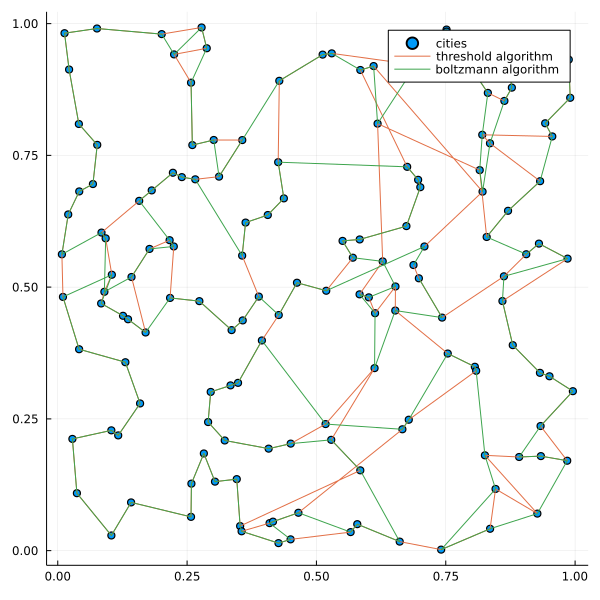

In [167]:
plot(cities[1], cities[2], seriestype=:scatter, label = "cities")
plot!(cities1[1], cities1[2], label = "threshold algorithm")
plot!(cities2[1], cities2[2], label = "boltzmann algorithm")
plot!(size=(600,600))